In [8]:
import os

os.environ['OPENAI_API_KEY'] = '****'
os.environ['LANGCHAIN_API_KEY'] = '****'
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_PROJECT'] = '08-01'

## OpenAIEmbeddings
- 문서 임베딩은 문서의 내용을 수치적인 벡터로 변환하는 과정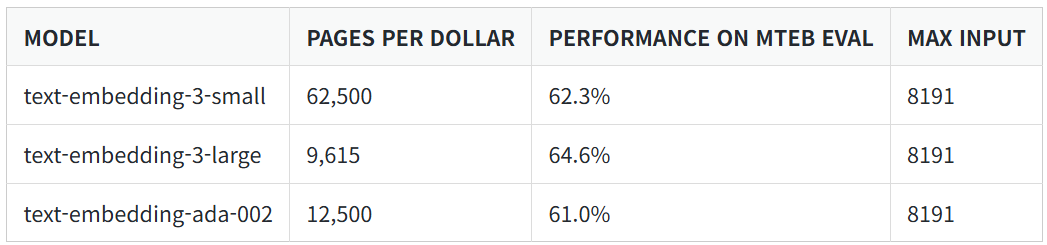

In [9]:
!pip install -qU langchain_openai

In [10]:
from langchain_openai import OpenAIEmbeddings

# OpenAI의 "text-embedding-3-small" 모델을 사용하여 임베딩을 생성
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

In [11]:
text = "손흥민은 세계적으로 위대한 축구선수입니다."

In [12]:
query_result = embeddings.embed_query(text)

In [7]:
query_result[:10]

[-0.002857483457773924,
 -0.013016929849982262,
 -0.032257020473480225,
 0.0022044081706553698,
 0.0164048969745636,
 0.014826818369328976,
 0.023073844611644745,
 0.05320892855525017,
 -0.0424744188785553,
 -0.06144704297184944]

## Document Embeddings
- embeddings.embed_documents() 함수를 사용하여 텍스트 문서를 임베딩

In [23]:
text_1  = "손흥민은 대한민국의 축구 선수로, 포지션은 공격수이다. 현재 잉글랜드 프리미어리그의 토트넘 홋스퍼와 대한민국 축구 국가대표팀 소속으로 활동하고 있으며 두 팀의 주장을 맡고 있다. 그는 구단에서의 활약을 바탕으로 역대 최고의 아시아 축구 선수 중 한 명으로 간주되고 있다"

doc_result = embeddings.embed_documents(
    [text_1]
)

In [28]:
doc_result[0][:5]

[-0.06442585587501526,
 0.013268069364130497,
 0.0074198320508003235,
 -0.005729177035391331,
 -0.02011641301214695]

## 차원 지정
- text-embedding-3 모델 클래스를 사용하면 반환되는 임베딩의 크기를 지정할 수 있음
- 기본적으로 text-embedding-3-small는 1536 차원의 임베딩을 반환


In [29]:
len(doc_result[0])

1536

## 차원(dimensions) 조정
- dimensions=1024를 전달함으로써 임베딩의 크기를 1024로 줄일 수 있음

In [30]:
embeddings_1024 = OpenAIEmbeddings(model="text-embedding-3-small", dimensions=1024)

In [31]:
# 주어진 텍스트를 임베딩하고 첫 번째 임베딩 벡터의 길이를 반환
len(embeddings_1024.embed_documents([text])[0])


1024

## 유사도 계산

In [16]:
sentence1 = "안녕하세요? 반갑습니다."
sentence2 = "안녕하세요? 반갑습니다!"
sentence3 = "안녕하세요? 만나서 반가워요."
sentence4 = "Hi, nice to meet you."
sentence5 = "I like to eat apples."


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

sentences = [sentence1, sentence2, sentence3, sentence4, sentence5]
embedded_sentences = embeddings_1024.embed_documents(sentences)


In [36]:
def similarity(a, b):
    return cosine_similarity([a], [b])[0][0]


In [37]:
for i, sentence in enumerate(embedded_sentences):
    for j, other_sentence in enumerate(embedded_sentences):
        if i < j:
            print(
                f"[유사도 {similarity(sentence, other_sentence):.4f}] {sentences[i]} \t <=====> \t {sentences[j]}"
            )

[유사도 0.9644] 안녕하세요? 반갑습니다. 	 <=====> 	 안녕하세요? 반갑습니다!
[유사도 0.8376] 안녕하세요? 반갑습니다. 	 <=====> 	 안녕하세요? 만나서 반가워요.
[유사도 0.5042] 안녕하세요? 반갑습니다. 	 <=====> 	 Hi, nice to meet you.
[유사도 0.1362] 안녕하세요? 반갑습니다. 	 <=====> 	 I like to eat apples.
[유사도 0.8142] 안녕하세요? 반갑습니다! 	 <=====> 	 안녕하세요? 만나서 반가워요.
[유사도 0.4790] 안녕하세요? 반갑습니다! 	 <=====> 	 Hi, nice to meet you.
[유사도 0.1318] 안녕하세요? 반갑습니다! 	 <=====> 	 I like to eat apples.
[유사도 0.5128] 안녕하세요? 만나서 반가워요. 	 <=====> 	 Hi, nice to meet you.
[유사도 0.1409] 안녕하세요? 만나서 반가워요. 	 <=====> 	 I like to eat apples.
[유사도 0.2249] Hi, nice to meet you. 	 <=====> 	 I like to eat apples.
